# Ceneo Analyzer

## Załadowanie bibliotek

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Lista kodów produktów, dla których zostały pobrane opinie

In [2]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")],sep="\n")

138331381
39562616


## Wczytanie kodu produktu od użytkownika

In [3]:
product_id = input("Podaj kod produktu: ")

## Wczytanie do obiektu pandas.DataFrame opinii

In [4]:
opinions=pd.read_json(f"opinions/{product_id}.json")
opinions.stars=opinions.stars.apply(lambda s:s.split("/")[0].replace(",",".")).astype(float)
opinions.recommendation = opinions.recommendation.apply(lambda r: "Brak rekomendacji" if r is None else r)

## Podstawowe statystyki

In [5]:
opinions_count = opinions.shape[0]
pros_count= opinions.pros.apply(lambda p:None if not p else p).count()
cons_count=opinions.cons.apply(lambda c:None if not c else c).count()
average_stars=opinions.stars.mean()

In [6]:
pros_count #źle dla 138..

30

## Histogram częstości poszczególnych ocen produktu

In [7]:
stars_distribution= opinions.stars.value_counts().reindex(list(np.arange(0,5.5,0.5)),fill_value=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.5'),
  Text(2, 0, '1.0'),
  Text(3, 0, '1.5'),
  Text(4, 0, '2.0'),
  Text(5, 0, '2.5'),
  Text(6, 0, '3.0'),
  Text(7, 0, '3.5'),
  Text(8, 0, '4.0'),
  Text(9, 0, '4.5'),
  Text(10, 0, '5.0')])

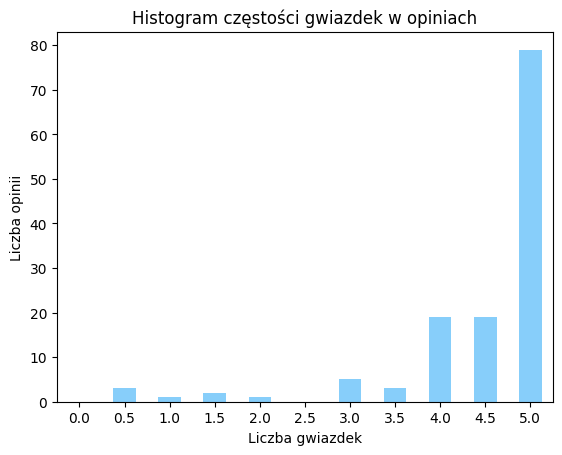

In [8]:
stars_distribution.plot.bar(color="lightskyblue")
plt.title("Histogram częstości gwiazdek w opiniach")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.xticks(rotation=0)

## Udział poszczegolnych rekomendacji w ogolnej liczbie opinii

In [9]:
recommendations_distribution=opinions.recommendation.value_counts(dropna=False).reindex(["Polecam","Brak rekomendacji", "Nie polecam"], fill_value=0)
recommendations_distribution

recommendation
Polecam              114
Brak rekomendacji     11
Nie polecam            7
Name: count, dtype: int64

Text(0.5, 1.0, 'Udział rekomendacji opiniach')

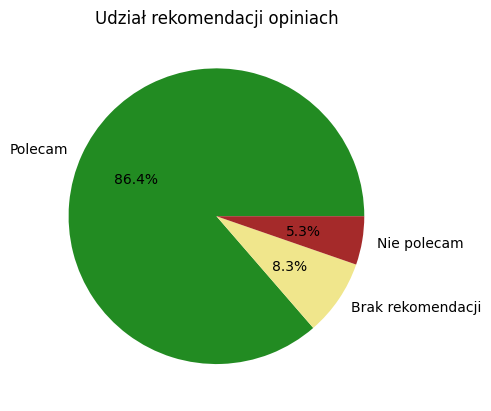

In [10]:
recommendations_distribution.plot.pie(
    colors=["forestgreen","khaki","brown"],
      label="",
      autopct="%1.1f%%"
)

plt.title("Udział rekomendacji opiniach")